# **Name : MD Fahimul Islam**
# **Reg No: 2017331026**
# Here I represent Naive Bayes :


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from matplotlib.pyplot import figure


In [ ]:
iris = load_iris()

In [ ]:
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names

df['type'] = iris.target

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
type_dict = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2]
}

type_dict

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [ ]:
df['name'] = [type_dict[x] for x in df.type]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


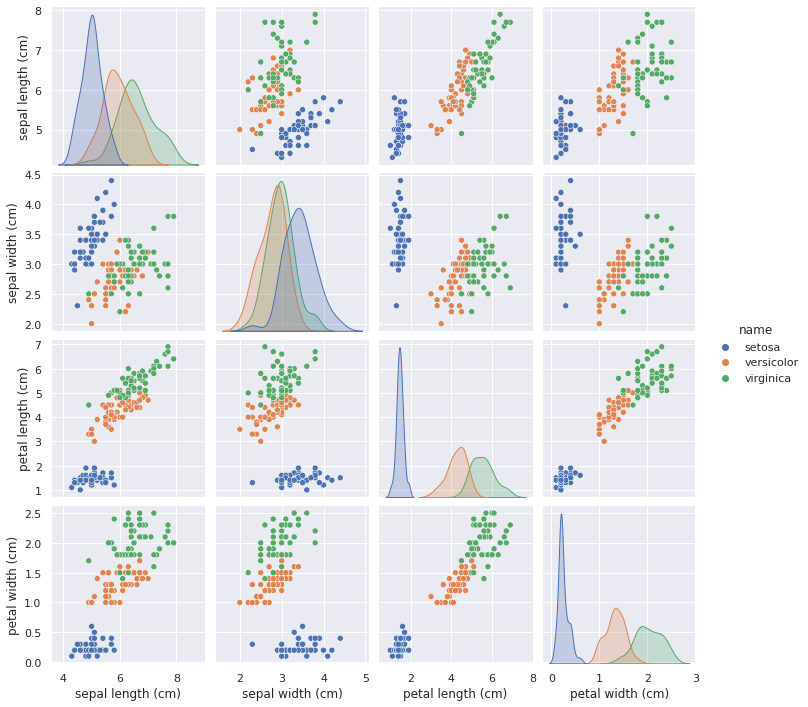

In [ ]:
df2 = df.copy()
df2.drop(columns="type",inplace=True)
sns.pairplot(df2 , hue="name")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


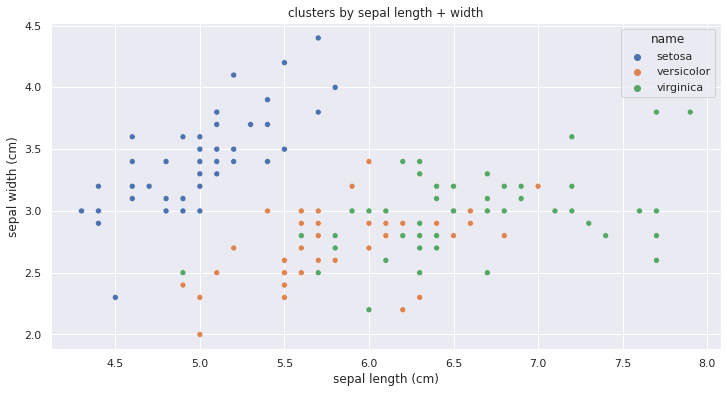

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.scatterplot(df['sepal length (cm)'], df['sepal width (cm)'], hue = df['name'])
plt.title('clusters by sepal length + width')
figure(figsize=(8, 6), dpi=80)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


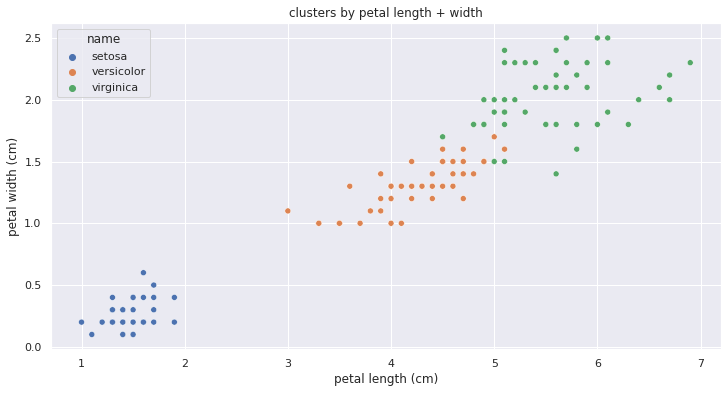

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.scatterplot(df['petal length (cm)'], df['petal width (cm)'], hue = df['name'])
plt.title('clusters by petal length + width')
figure(figsize=(8, 6), dpi=80)
plt.show()

Removing Sepal feature

In [ ]:
df.drop(columns="sepal length (cm)",inplace=True)
df.drop(columns="sepal width (cm)",inplace=True)


In [ ]:
df.head()

,petal length (cm),petal width (cm),type,name
0,1.4,0.2,0,setosa
1,1.4,0.2,0,setosa
2,1.3,0.2,0,setosa
3,1.5,0.2,0,setosa
4,1.4,0.2,0,setosa


In [ ]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_Naive Bayes: 0.978
precision_Naive Bayes: 0.978
recall_Naive Bayes: 0.978
f1-score_Naive Bayes : 0.978


Creating all possible datapoint to visualize decision boundary

In [ ]:
x_grid = np.linspace(0, 7, 70) 
y_grid = np.linspace(0, 3, 30) 

#generate all possible value pairs of x and y
xx, yy = np.meshgrid(x_grid, y_grid) 
length, width = xx.shape 
n_test = length*width 

#make a single column of feature values
f1 = xx.reshape(n_test, 1) 
f2 = yy.reshape(n_test, 1) 
#make test data with above two features
test_data = np.concatenate([f1, f2], axis = 1) 
print(test_data.shape)

(2100, 2)


In [ ]:
Y_pred_decision = gaussian.predict(test_data)
np.reshape(Y_pred_decision, (2100, 1))

a = np.zeros((2100,2))
b = []
decision_data = np.concatenate([test_data, a], axis = 1)

for i in range(2100):
    decision_data[i][2] = Y_pred_decision[i]
    if Y_pred_decision[i] == 0:
      b.append("Setosa")
    elif Y_pred_decision[i] == 1:
      b.append("Versicolor")
    else:
      b.append("Virginica")



decision_data = pd.DataFrame( data = decision_data ,columns=['PetalLengthCm', 'PetalWidthCm', 'Prediction', 'Emnei'])
# decision_data.drop(columns="Hudai",inplace=True)
decision_data

,PetalLengthCm,PetalWidthCm,Prediction,Emnei
0,0.000000,0.0,0.0,0.0
1,0.101449,0.0,0.0,0.0
2,0.202899,0.0,0.0,0.0
3,0.304348,0.0,0.0,0.0
4,0.405797,0.0,0.0,0.0
...,...,...,...,...
2095,6.594203,3.0,2.0,0.0
2096,6.695652,3.0,2.0,0.0
2097,6.797101,3.0,2.0,0.0
2098,6.898551,3.0,2.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


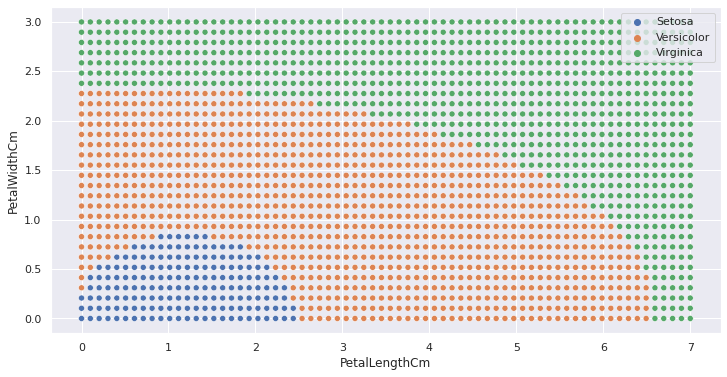

In [ ]:
# g=sns.relplot(x='PetalLengthCm',y='PetalWidthCm',data=decision_data, hue='Prediction')
sns.scatterplot(decision_data.PetalLengthCm, decision_data.PetalWidthCm, hue = b)
sns.set(rc={'figure.figsize':(12,6)})

# g.fig.set_size_inches(10,5)
plt.show()

Performing dimension reduction on Iris dataset using PCA

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

df = pd.DataFrame(iris.data)

df.columns = iris.feature_names

df['type'] = iris.target

type_dict = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2]
}

df['name'] = [type_dict[x] for x in df.type]

# sns.scatterplot(df['petal length (cm)'], df['petal width (cm)'], hue = df['name'])
# plt.title('clusters by petal length + width')
# plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

x = df.drop(['type', 'name'], axis=1).values

x_scale = StandardScaler().fit_transform(x)

pd.DataFrame(x_scale, columns = iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


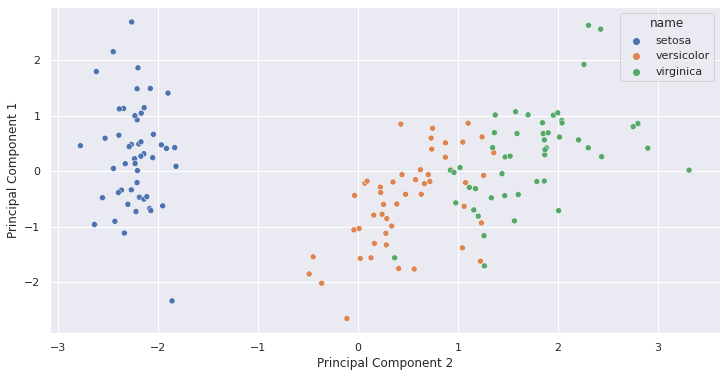

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x_scale)

pca2_df = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])


sns.scatterplot(pca2_df.pca1, pca2_df.pca2, hue = df.name)
sns.set(rc={'figure.figsize':(12,6)})
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')

plt.show()

In [ ]:
pca2_df

,pca1,pca2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [ ]:
X = pca2_df.iloc[:,0:2].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 

accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(gaussian.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred,)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression Using Principal Components\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression Using Principal Components
 [[16  0  0]
 [ 0 16  2]
 [ 0  2  9]]
accuracy_Logistic Regression : 0.911
precision_Logistic Regression : 0.911
recall_Logistic Regression: 0.911
f1-score_Logistic Regression : 0.911
